In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pprint import pprint
import time
import json
import random
from scipy.stats import linregress
import os
from config import api_key

# Import API key
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

output_data_file = "Output/weather_df.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

Perform API Calls

Perform a weather check on each city using a series of successive API calls. Include a print log of each city as it'sbeing processed (with the city number and city name).

In [21]:
# set lists for the dataframe

city_two = []
cloudiness = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | hvide%20sande
Processing Record 2 of Set 1 | camana
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | brae
Processing Record 5 of Set 1 | chokurdakh
Processing Record 6 of Set 1 | grand%20gaube
Processing Record 7 of Set 1 | quatre%20cocos
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | mount%20gambier
Processing Record 10 of Set 1 | afsin
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | voznesenye
City not found. Skipping...
Processing Record 13 of Set 1 | kharan
Processing Record 14 of Set 1 | lancaster
Processing Record 15 of Set 1 | cape%20town
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | leningradskiy
Processing Record 18 of Set 1 | bambous%20virieux
Processing Record 19 of Set 1 | mahebourg
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | rakovski
Processing Record 22 of Set 1 | torbay
Processing Record 23 of Set 1 | asau
Processing Re

Processing Record 41 of Set 4 | seminole
Processing Record 42 of Set 4 | acari
Processing Record 43 of Set 4 | bulungu
Processing Record 44 of Set 4 | dikson
Processing Record 45 of Set 4 | san%20quintin
Processing Record 46 of Set 4 | horki
Processing Record 47 of Set 4 | aksarka
Processing Record 48 of Set 4 | alto%20longa
City not found. Skipping...
Processing Record 49 of Set 4 | geraldton
Processing Record 1 of Set 5 | mamallapuram
Processing Record 2 of Set 5 | bathsheba
Processing Record 3 of Set 5 | takoradi
Processing Record 4 of Set 5 | ponta%20delgada
Processing Record 5 of Set 5 | presidencia%20roque%20saenz%20pena
Processing Record 6 of Set 5 | kavieng
Processing Record 7 of Set 5 | fortuna
Processing Record 8 of Set 5 | lebu
Processing Record 9 of Set 5 | east%20london
Processing Record 10 of Set 5 | los%20llanos%20de%20aridane
Processing Record 11 of Set 5 | barrow
Processing Record 12 of Set 5 | trinidad
Processing Record 13 of Set 5 | novikovo
Processing Record 14 of S

Processing Record 36 of Set 8 | port%20macquarie
Processing Record 37 of Set 8 | san%20lazaro
Processing Record 38 of Set 8 | atraulia
Processing Record 39 of Set 8 | mackay
Processing Record 40 of Set 8 | guerrero%20negro
Processing Record 41 of Set 8 | hervey%20bay
Processing Record 42 of Set 8 | lodwar
Processing Record 43 of Set 8 | kolarovo
Processing Record 44 of Set 8 | slave%20lake
Processing Record 45 of Set 8 | gisborne
Processing Record 46 of Set 8 | abu%20samrah
Processing Record 47 of Set 8 | corrente
Processing Record 48 of Set 8 | auki
Processing Record 49 of Set 8 | tuatapere
Processing Record 1 of Set 9 | izazi
Processing Record 2 of Set 9 | vila%20velha
Processing Record 3 of Set 9 | longyearbyen
Processing Record 4 of Set 9 | litomerice
Processing Record 5 of Set 9 | touros
Processing Record 6 of Set 9 | hofn
Processing Record 7 of Set 9 | saeby
Processing Record 8 of Set 9 | kozmodemyansk
Processing Record 9 of Set 9 | gat
Processing Record 10 of Set 9 | moron
Proce

Convert Raw Data to DataFrame

Export the city data into a .csv. Display the DataFrame

In [23]:
# create dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudiness,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [24]:
# create dataframe
weather_dataframe = pd.DataFrame(weather_dict)
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hvide%20sande,87,DK,1579932187,100,56.00,8.13,43.00,6.93
1,camana,100,PE,1579932095,86,-16.62,-72.71,66.47,2.21
2,mataura,71,NZ,1579932187,60,-46.19,168.86,66.00,10.00
3,brae,100,GB,1579932187,87,60.40,-1.35,46.40,26.40
4,chokurdakh,18,RU,1579932187,95,70.63,147.92,-35.27,1.97


In [25]:
# output data to csv
weather_dataframe.to_csv('output_data/cities.csv')

In [26]:
weather_dataframe.count()

City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64

Plotting the Data

Use proper labeling of the plots using plot titles (including date of analysis) and axes labels. Save the plotted figures as .pngs.

Latitude vs. Temperature Plot

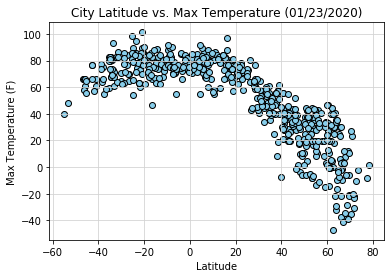

In [27]:
# create a graph for latitude
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (01/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("figures/fig1.png")
plt.show()

Latitude vs. Humidity Plot

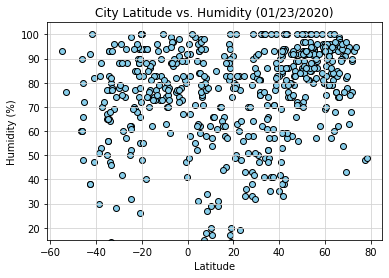

In [28]:
# create graph for latitude vs. humidity
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (01/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("figures/fig2.png")
plt.show()

Latitude vs. Cloudiness

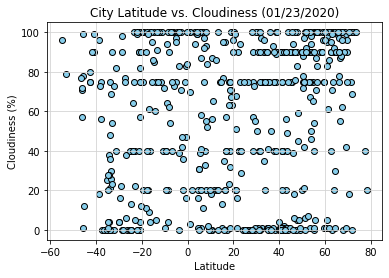

In [29]:
# create graph for latitude vs. cloudiness
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (01/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("figures/fig3.png")
plt.show()

Latitude vs. Wind Speed

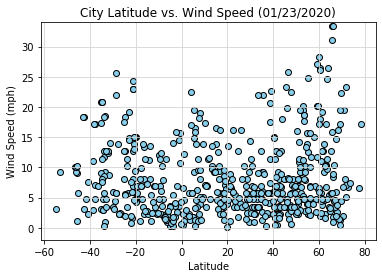

In [30]:
# Create graph for latitude vs. wind speed
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (01/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("figures/fig4.png")
plt.show()

Create a function to create Linear Regression plots Create Northern and Southern Hemisphere DataFrames

In [31]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_dataframe.loc[pd.to_numeric(weather_dataframe["Lat"]).astype(float) > 0, :]
southern_df = weather_dataframe.loc[pd.to_numeric(weather_dataframe["Lat"]).astype(float) < 0, :]

Regression line equation is: y = -1.31x + 91.62
The r-squared is: -0.8632118353474495
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


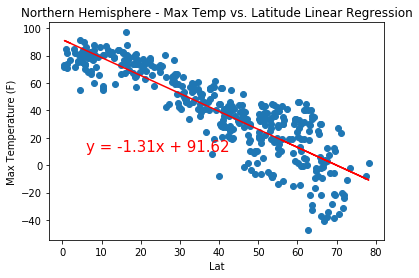

In [32]:
# create linear regression chart for Northern Hemisphere Temp vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.savefig("figures/fig5.png")
plt.show()

Regression line equation is: y = -1.31x + 91.62
The r-squared is: -0.8632118353474495
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.

Regression line equation is: y = 0.27x + 81.19
The r-squared is: 0.35667449681384045
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


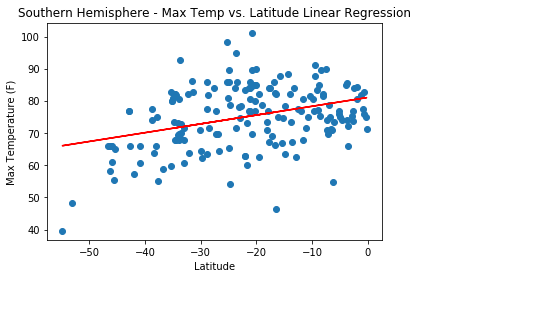

In [33]:
# create linear regression chart for Southern Hemisphere Temp vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.savefig("figures/fig6.png")
plt.show()

Regression line equation is: y = 0.27x + 81.19
The r-squared is: 0.35667449681384045
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.

Regression line equation is: y = 0.38x + 61.02
The r-squared is: 0.3736191780533146
The regression does not display much of a correlation between the data sets.


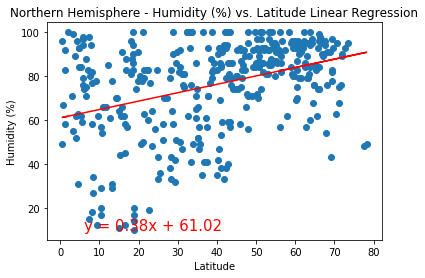

In [34]:
# create linear regression chart for Northern Hemisphere Humidity vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.savefig("figures/fig7.png")
plt.show()

Regression line equation is: y = 0.38x + 61.02
The r-squared is: 0.3736191780533146
The regression does not display much of a correlation between the data sets.

Regression line equation is: y = 0.37x + 82.99
The r-squared is: 0.25876119317942975
The regression does not display much of a correlation between the data sets.


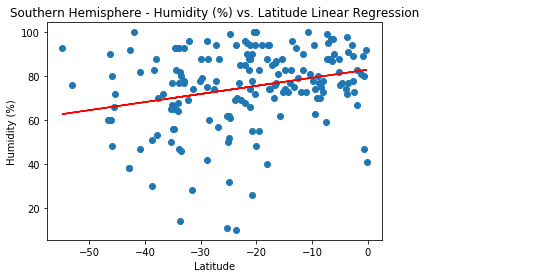

In [35]:
# create linear regression chart for Southern Hemisphere Humidity vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("figures/fig8.png")
plt.show()

Regression line equation is: y = 0.37x + 82.99
The r-squared is: 0.25876119317942975
The regression does not display much of a correlation between the data sets.

Regression line equation is: y = 0.43x + 42.2
The r-squared is: 0.22875666737600409
The regression does not display much of a correlation between the data sets.


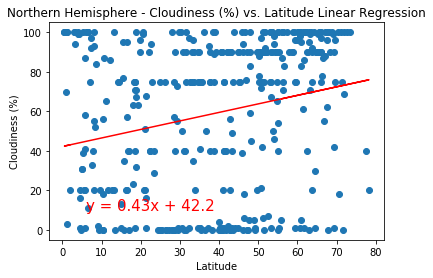

In [36]:
# create linear regression chart for Northern Hemisphere Cloudiness vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("figures/fig9.png")
plt.show()

Regression line equation is: y = 0.43x + 42.2
The r-squared is: 0.22875666737600409
The regression does not display much of a correlation between the data sets.

Regression line equation is: y = 0.65x + 68.81
The r-squared is: 0.2264539842391651
The regression does not display much of a correlation between the data sets.


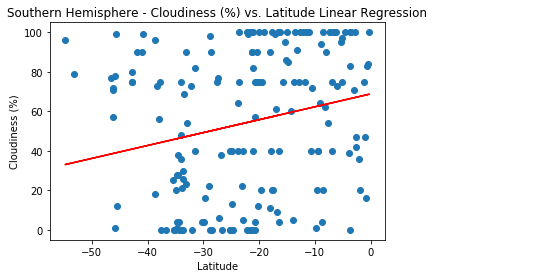

In [37]:
# create linear regression chart for Southern Hemisphere Cloudiness vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("figures/fig10.png")
plt.show()

Regression line equation is: y = 0.65x + 68.81
The r-squared is: 0.2264539842391651
The regression does not display much of a correlation between the data sets.

Regression line equation is: y = 0.06x + 5.75
The r-squared is: 0.18641389343888476
The regression does not display much of a correlation between the data sets.


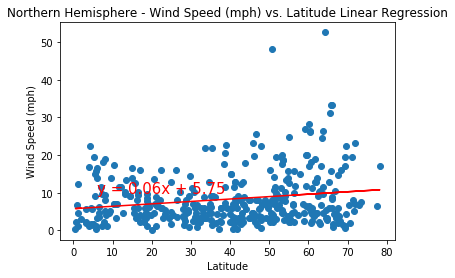

In [38]:
# create linear regression chart for Northern Hemisphere Wind Speed vs. Latitude
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("figures/fig11.png")
plt.show()

Regression line equation is: y = 0.06x + 5.75
The r-squared is: 0.18641389343888476
The regression does not display much of a correlation between the data sets.

Regression line equation is: y = -0.11x + 5.48
The r-squared is: -0.2489475576892535
The regression does not display much of a correlation between the data sets.


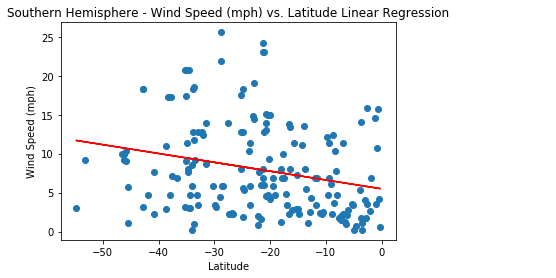

In [39]:
# create linear regression chart for Southern Hemisphere Wind Speed vs. Latitude
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("figures/fig12.png")
plt.show()

Regression line equation is: y = -0.11x + 5.48
The r-squared is: -0.2489475576892535
The regression does not display much of a correlation between the data sets.